# Plot de Histograma 3D - time residuals, cos(angulo entre dirección de eventos y hits), counts


Atención: algunas secciones de este notebook estan hechas para tratar simulaciones con solo 1 job. CUIDADO AL CORRER TODAS LAS CELDAS PORQUE DARÁ ERROR!

-------------------------------------------

Función para aplanar listas

In [8]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [9]:
a = [[2,1],[1,2]]
flatten(a)

[2, 1, 1, 2]

-------------------------------------------

In [1]:
from analysis_simulation_subset import Analysis_simulation, magnitude
import uproot
import numpy as np
from numpy import array, where, shape, reshape, pi

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sn

import pandas as pd

# 1 - Extraer datos

## 1.1 - datos simulados

In [2]:
file = uproot.open("/snoplus simulations/electron bulk/center point/simu_Analysis_elec_10MeV.root")
data1 = file['T;6']
evtid = np.array(data1['mcID'])

In [3]:
#df = Analysis_simulation(file, [0,2,3,4])
ID_list = np.unique(evtid)
df = Analysis_simulation(file)
df.head()

job: 0
job: 1
job: 2
job: 3


,job,eventID,hitpmt ID,hit type,time residual,mc coordinates,mc radius,reconst radius,reconst error,PMT xyz,PMT spherical,hitpmt ID hit 1,hitpmt ID hit 2,time residual hit 1,time residual hit 2,xyz hit 1,spherical hit 1,xyz hit 2,spherical hit 2
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[5143, 9638, 6384, 5947, 4877, 2327, 2718, 59...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[-136.57445262258054, -9.782284484595692, 3.4...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[169.45076562786218, 220.66149963142564, 114.6...","[169.45076562786218, 220.66149963142564, 114.6...","[[[-5040.03, -3961.15, -5431.2699999999995], [...","[[[2.273700727006004, -2.475485244163794, 8401...","[[6384, 5947, 4877, 2327, 2718, 5929, 6315, 53...","[[688, 6868, 3877, 5333, 2297, 3379, 3921, 325...","[[3.4611086235824473, 3.40761036913176, 1.4174...","[[3.480745322832149, 5.460527562028375, 7.3689...","[[[-1587.17, -2619.61, 7810.119999999999], [-4...","[[[0.37374075763615444, -2.1155283365860664, 8...","[[[4944.55, 6554.450000000001, -1901.15], [-0....","[[[1.7983421096939602, 0.9244975165720382, 842..."
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[7212, 7256, 5871, 7330, 7290, 8354, 337, 834...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[5.527437958958103, 3.0473798810866697, 2.420...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[205.38440546189156, 174.36864097551452, 157.6...","[205.38440546189156, 174.36864097551452, 157.6...","[[[1150.05, -5440.75, -6311.88], [951.91000000...","[[[2.4193564345152625, -1.3624855559878644, 84...","[[7212, 7256, 5871, 7330, 7290, 8354, 337, 834...","[[7311, 7000, 7048, 8679, 7205, 381, 8536, 804...","[[5.527437958958103, 3.0473798810866697, 2.420...","[[4.1807537800645775, 1.7437384685287611, 9.43...","[[[1150.05, -5440.75, -6311.88], [951.91000000...","[[[2.4193564345152625, -1.3624855559878644, 84...","[[[1439.5900000000001, -7538.9400000000005, -3...","[[[1.9899960635839047, -1.3821138768757448, 84..."
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[4244, 4452, 5035, 5463, 4704, 4828, 5926, 42...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[109.32870277905525, 3.5975471309273814, 2.19...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[232.2198231235202, 83.84724826784414, 190.787...","[232.2198231235202, 83.84724826784414, 190.787...","[[[-6993.869999999999, 4359.12, -1738.54000000...","[[[1.7787068922209215, 2.5842331352303427, 842...","[[4244, 4452, 5035, 5463, 4704, 4828, 5926, 42...","[[5118, 2840, 5444, 9649, 5502, 5105, 6553, 70...","[[109.32870277905525, 3.5975471309273814, 2.19...","[[3.501338604346472, 39.99607056161429, 3.4668...","[[[-6993.869999999999, 4359.12, -1738.54000000...","[[[1.7787068922209215, 2.5842331352303427, 842...","[[[-8188.55, 465.18, 1915.79], [-2009.46, 4291...","[[[1.3413276248722477, 3.0848450542475443, 842..."
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[4499, 7306, 5620, 4182, 6608, 5689, 5677, 58...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[38.11211224922954, 2.942122472222934, 4.0101...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[127.33553668858235, 210.97553501927445, 205.1...","[127.33553668858235, 210.97553501927445, 205.1...","[[[-8179.26, 1655.0700000000002, 1018.34], [15...","[[[1.4493671962277699, 2.941938885915749, 8406...","[[4499, 7306, 5620, 4182, 6608, 5689, 5677, 58...","[[1746, 3994, 7805, 5118, 8813, 8810, 9654, 62...","[[38.11211224922954, 2.942122472222934, 4.0101...","[[2.611980411051576, 5.191900040246594, 2.9457...","[[[-8179.26, 1655.0700000000002, 1018.34], [15...","[[[1.4493671962277699, 2.941938885915749, 8406...","[[[916.5600000000001, 1261.47, 8253.98], [-617...","[[[0.18671342952257486, 0.9424526858493242, 8

### 1.1.1 - Unify all Info

In [13]:
#Info to be concatenated:

multi_time_residual = np.array([])
multi_pmt_ID = np.array([], dtype= np.int64)
multi_cos_angle = np.array([])
pmt_multi_ev_xyz = []
pmt_multi_ev_sph = []


job = (df['job']).to_numpy()

#run over jobs
for job_i in job:
    print(job_i)
    
    job_n = df.loc[df['job'] == job_i]
    
    evtID_job = (job_n['eventID']).to_numpy()[0]
    time_residual_job = (job_n['time residual']).to_numpy()[0]        #Time residual structure --> time_res[0][evID]
    hitpmt_ID_job = (job_n['hitpmt ID']).to_numpy()[0]                #hitpmt_ID structure --> hitpmt_ID[0][evID]
    xyz_hit = (job_n['PMT xyz']).to_numpy()[0]                        #coord structure --> xyz_hit [0][evID]
    sph_hit = (job_n['PMT spherical']).to_numpy()[0]                  #coord structure --> sph_hit [0][evID]

    # On each job, run over the mcIDs and extract info for each ID
    for ID_i in np.unique(evtID_job):
        
        multi_time_residual = np.append(multi_time_residual, time_residual_job[ID_i]).ravel()
        multi_pmt_ID = np.append(multi_pmt_ID, hitpmt_ID_job[ID_i]).ravel()
        
        xyz_hit_id = xyz_hit[ID_i]
        sph_hit_id = sph_hit[ID_i]

        #compute cos(α)
        cos_id = []
        N = np.shape(xyz_hit_id)[0]
        vec_ev = np.array([0.0, 0.0, -1.0])
        for k in range(N):
            cos_val = np.dot(xyz_hit_id[k],vec_ev)/np.linalg.norm(xyz_hit_id[k])
            cos_id.append(cos_val)
        multi_cos_angle = np.append(multi_cos_angle, cos_id).ravel()


0
1
2
3


### 1.1.2 - Check reconstruction Error

recons_error = np.array(df['reconst error'])

matplotlib.rcdefaults()

plt.figure(figsize=(30,10))
plt.title('Error of Reconstruction |r - r´|')
plt.ylabel('error (mm)')
plt.xlabel('mcID')

plt.plot(recons_error)
plt.grid()
#plt.xticks(ID)
plt.show()

## 1.2 - calculo de observable $cos(\alpha)$

- calculo del coseno via la definición de producto escalar;
- Uso las funciones de numpy np.dot() para calcular producto escalar y np.linalg.norm() para calcular la norma de los vectores

# event direction:
vec_ev = np.array([0.0, 0.0, -1.0])

#proof
print('scalar product', np.dot(vec_ev,vec_ev))
print('norm',np.linalg.norm(vec_ev))

# extract the xyz_hit_coordinantes_type1 and time_residuals of ev_id = ?
ID = 3
evt_id_n = df.loc[df['eventID'] == ID]

#pmt_id = (evt_id_n['hitpmt ID']).to_numpy()[0]
xyz_hit = (evt_id_n['PMT xyz']).to_numpy()[0]
xyz_hit_1 = (evt_id_n['xyz hit 1']).to_numpy()[0][0]
xyz_hit_2 = (evt_id_n['xyz hit 2']).to_numpy()[0][0]

time_residual_hit1 = (evt_id_n['time residual hit 1']).to_numpy()[0]
time_residual = (evt_id_n['time residual']).to_numpy()[0]

xyz_hit[0]

#Compute cos(angle)
vec_ev = np.array([0.0, 0.0, -1.0])
cos_angle = np.array([])

N = shape(xyz_hit)[0] 
for i in range(N):
    cos_val = np.dot(xyz_hit[i],vec_ev)/np.linalg.norm(xyz_hit[i])
    cos_angle = np.append(cos_angle, cos_val)
cos_angle

# 2 - Gráficos

## 2.1 - 2D histogram

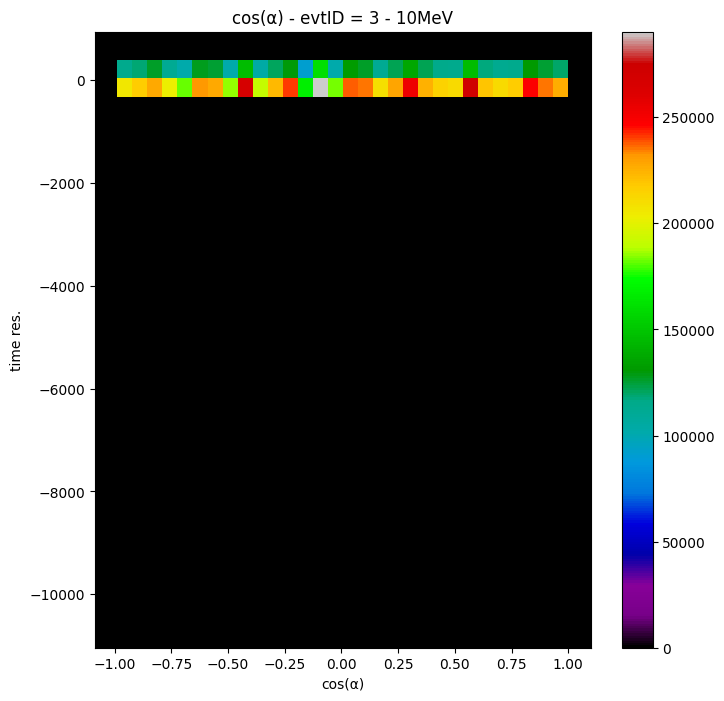

In [15]:
title = 'cos(α) - evtID = 3 - 10MeV'

plt.figure(figsize=(8,8))
sn.set_style(rc = {'axes.facecolor': 'black'})
sn.histplot(x = multi_cos_angle, y = multi_time_residual, bins = [30,30], stat='count', cbar = 'True', cmap = cm.nipy_spectral)
plt.ylabel('time res.')
plt.xlabel('cos(α)')
plt.title(title)

#equal acis ration
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')
plt.show()

## 2.2 - 3D histogram

#importing the libraries
%matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#extract count of events
counts, x_bin_edges, y_bin_edges = np.histogram2d(x = cos_angle, y = time_residual, bins = [30, 30]) #PROBLEMA! No me deja usar nº diferente de bins

#Obtain coordinates of bins ---------------------------------
x_bin = [] # x_bin coordinate
y_bin = [] # y_bin coordinate

Nx = len(x_bin_edges)
Ny = len(y_bin_edges)

for (x_i, y_i) in zip(range(Nx-1), range(Ny-1)):
    mid_point_x = (x_bin_edges[x_i] + x_bin_edges[x_i+1])/2
    mid_point_y = (y_bin_edges[x_i] + y_bin_edges[x_i+1])/2
    
    x_bin.append(mid_point_x)
    y_bin.append(mid_point_y)
#----------------------------------------------------------------

xx, yy = np.meshgrid(x_bin, y_bin)

x, y = xx.ravel(), yy.ravel()
z = 0

bin_width_x = x_bin_edges[1] - x_bin_edges[0]
bin_width_y = y_bin_edges[1] - y_bin_edges[0]

dx = bin_width_x
dy = bin_width_y
dz = counts.T.ravel()

#plotting 3D bars
#more style: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
style.use('seaborn-v0_8-colorblind')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors: https://matplotlib.org/stable/gallery/color/named_colors.html
ax.bar3d(x, y, z, dx, dy, dz, color='cornflowerblue' )
ax.view_init(elev=24., azim=-33)

ax.set_xlabel('cos(α)')
ax.set_ylabel('time residual')
ax.set_zlabel('Counts')
plt.show()

#plt.savefig('proof.png', format='png')

### 2.2.1 - 3D plot con cortes en time residual

inf_cut = -5
up_cut = 30

time_residual_cut = np.array([]) 
cos_angle_cut = np.array([])                                  

#cuts
for i in np.where((np.array(time_residual) > inf_cut) & (np.array(time_residual) < up_cut))[0]:
    time_residual_cut = np.append(time_residual_cut, time_residual[i])
    cos_angle_cut = np.append(cos_angle_cut, cos_angle[i])

counts, x_bin_edges, y_bin_edges = np.histogram2d(x = cos_angle_cut, y = time_residual_cut, bins = [50, 50])

#Obtain coordinates of bins ---------------------------------
x_bin = []
y_bin = []

Nx = len(x_bin_edges)
Ny = len(y_bin_edges)

for (x_i, y_i) in zip(range(Nx-1), range(Ny-1)):
    mid_point_x = (x_bin_edges[x_i] + x_bin_edges[x_i+1])/2
    mid_point_y = (y_bin_edges[x_i] + y_bin_edges[x_i+1])/2
    
    x_bin.append(mid_point_x)
    y_bin.append(mid_point_y)
#----------------------------------------------------------------

xx, yy = np.meshgrid(x_bin, y_bin)

x, y = xx.ravel(), yy.ravel()
z = 0

bin_width_x = x_bin_edges[1] - x_bin_edges[0]
bin_width_y = y_bin_edges[1] - y_bin_edges[0]

dx = bin_width_x
dy = bin_width_y
dz = counts.T.ravel()

#plotting 3D bars
#more style: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
style.use('seaborn-v0_8-colorblind')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors: https://matplotlib.org/stable/gallery/color/named_colors.html
ax.bar3d(x, y, z, dx, dy, dz, color='cornflowerblue' )
ax.view_init(elev=24., azim=-33)

title = 'Hit type 1 - cut - evID = ' + str(ID) + ' - 10MeV ' 
x_title = ' cos(α) '
y_title = ' time residual '
z_title = 'Counts'

plt.title(title)
ax.set_xlabel(x_title)
ax.set_ylabel(y_title)
ax.set_zlabel(z_title)

plt.show()

## 2.3 Superposition 2D histograms: Multiples evIDs

##### extract the xyz_hit_coordinantes and time_residuals of ev_id

multi_cos_angle = []
multi_time_residual = np.array([])
multi_pmt_ID = np.array([], dtype= np.int64)

vec_ev = np.array([0.0, 0.0, -1.0])

for id_x in ID_list:
    evt_id_n = df.loc[df['eventID'] == id_x]
    time_residual_id = (evt_id_n['time residual']).to_numpy()[0]
    xyz_hit_id = (evt_id_n['PMT xyz']).to_numpy()[0]
    pmt_id = (evt_id_n['hitpmt ID']).to_numpy()[0]
    
    multi_time_residual = np.append(multi_time_residual, time_residual_id).ravel()
    multi_pmt_ID = np.append(multi_pmt_ID, pmt_id).ravel()
    
    #xyz_hit_1 = (evt_id_n['xyz hit 1']).to_numpy()[0][0]
    #xyz_hit_2 = (evt_id_n['xyz hit 2']).to_numpy()[0][0]
    #time_residual_hit1 = (evt_id_n['time residual hit 1']).to_numpy()[0]

    #compute cos(alpha)
    N = shape(xyz_hit_id)[0]
    for k in range(N):
        cos_val = np.dot(xyz_hit_id[k],vec_ev)/np.linalg.norm(xyz_hit_id[k])
        multi_cos_angle.append(cos_val)

In [22]:
# Time residual cuts

up_cut = 20
inf_cut = -5

multi_time_res_cut = []
multi_cos_angle_cut = []
multi_pmt_ID_cut = []

for i in np.where((multi_time_residual > inf_cut) & (multi_time_residual < up_cut))[0]:

    multi_time_res_cut.append(multi_time_residual[i])
    multi_cos_angle_cut.append(multi_cos_angle[i])
    multi_pmt_ID_cut.append(multi_pmt_ID[i])


In [23]:
%matplotlib
# 2d Histogram
title = 'cos(α) - Multiple evID - 5MeV'

plt.figure(figsize=(8,8))
sn.set_style(rc = {'axes.facecolor': 'black'})
sn.histplot(x = multi_cos_angle_cut, y = multi_time_res_cut, bins = [30,30], stat='count', cbar = 'True', cmap = cm.nipy_spectral)
plt.ylabel('time res.')
plt.xlabel('cos(α)')
plt.title(title)

#equal acis ration
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')
plt.show()

Using matplotlib backend: TkAgg


## 2.4 Extract and Plot PMTs giving Cherenkov

### 2.4.1 PMT Information

In [24]:
pmt_info = file['pmt;1']
pmt_info.keys()

['pmt_id', 'pmt_pos_xyz', 'pmt_pos_sph', 'pmt_type']

In [25]:
pmt_id = array(pmt_info['pmt_id'])
pmt_pos_xyz = array(pmt_info['pmt_pos_xyz'])
pmt_pos_sph = array(pmt_info['pmt_pos_sph'])
pmt_type = array(pmt_info['pmt_type'])

Recuerda, el ID del PMT coincide con el indice de su posición en la lista de coordenadas de PMT

In [26]:
pmt_multi_ev_xyz = []
pmt_multi_ev_sph = []

for i_dx in multi_pmt_ID_cut:
    pmt_multi_ev_xyz.append(pmt_pos_xyz[i_dx])
    pmt_multi_ev_sph.append(pmt_pos_sph[i_dx])

pmt_multi_ev_xyz = np.array(pmt_multi_ev_xyz)
pmt_multi_ev_sph = np.array(pmt_multi_ev_sph)

In [27]:
#cartesian
x_multi_ev = pmt_multi_ev_xyz[:,0]
y_multi_ev = pmt_multi_ev_xyz[:,1]
z_multi_ev = pmt_multi_ev_xyz[:,2]

#spherical
zenit_multi_ev = pmt_multi_ev_sph[:,0]
azimut_multi_ev = pmt_multi_ev_sph[:,1]

In [28]:
len(x_multi_ev)

5543469

### 2.4.2 Plot PMTs

#### Angular Plot

Hacer estos gráficos para direcciones aleatorias ya no tiene sentido! No vamos a observar una circunferencia en el plano xy, sino en otro plano determinado por el mc_momentum

In [29]:
bins = 25
title = '$φ(cos(θ)$ angular distribution - Multi EV - 10MeV - cut'
x_title = 'cos(zenith)'
y_title = 'azimuth'

plt.figure(figsize=(8,8))
plt.hist2d(x = np.cos(zenit_multi_ev), y = azimut_multi_ev, bins = [bins,bins], density = True)
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.title(title)

plt.show()

#### 3D cartesian plot

In [19]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_multi_ev, y_multi_ev, z_multi_ev, c = 'blue', s = 1)
#ax.scatter(x_hit_2, y_hit_2, z_hit_2, c = 'r', s = 5, label = 'SCINT')
#ax.scatter(x_vertex, y_vertex, z_vertex, c = 'g', s = 10, label = 'VERTEX')
plt.legend()

ax.axes.set_xlim3d(left=-9000, right=9000) 
ax.axes.set_ylim3d(bottom=-9000, top=9000) 
ax.axes.set_zlim3d(bottom=-9000, top=9000) 

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [80]:
pmt_multi_ev_xyz

array([[ -590.79,  8176.05, -1561.49],
       [-2919.72,  1646.2 , -7709.78],
       [  364.87,  8337.09,  1018.02],
       ...,
       [ 7761.61,  2677.09,  1901.15],
       [ 6457.76,  5274.93,  1071.42],
       [-4593.05,  6858.03, -1640.88]])